In [1]:
import imagej
import jpype.imports

from jpype import JImplements, JOverride
from scyjava import jimport

ij =imagej.init(['io.github.mianalysis:mia-plugin:2.0.0-SNAPSHOT'])

ImageI = jimport('io.github.mianalysis.mia.object.image.ImageI')
WorkspaceI = jimport('io.github.mianalysis.mia.object.WorkspaceI')
MetadataI = jimport('io.github.mianalysis.mia.object.metadata.MetadataI')
ImageRendererI = jimport('io.github.mianalysis.mia.object.image.renderer.ImageRenderer')

FilterImage = jimport('io.github.mianalysis.mia.module.images.process.FilterImage')
IdentifyObjects = jimport('io.github.mianalysis.mia.module.objects.detect.IdentifyObjects')
ImageLoader = jimport('io.github.mianalysis.mia.module.inputoutput.ImageLoader')
ShowImage = jimport('io.github.mianalysis.mia.module.visualise.ShowImage')
ThresholdImage = jimport('io.github.mianalysis.mia.module.images.process.threshold.GlobalAutoThreshold')


OpenJDK 64-Bit Server VM warning: Attempt to protect stack guard pages failed.
OpenJDK 64-Bit Server VM warning: Attempt to deallocate stack guard pages failed.


[INFO] Overriding MIA; identifier: command:io.github.mianalysis.mia.MIA_; jar: file:/Users/sc13967/.jgo/io.github.mianalysis/mia-plugin/2.0.0-SNAPSHOT/d2fe3ba7f0550a523403e0d047b1788b5d374c2a09c72a0b89f635395f421067/mia-plugin-2.0.0-SNAPSHOT.jar
[INFO] Overriding MIA (headless); identifier: command:io.github.mianalysis.mia.MIAHeadless; jar: file:/Users/sc13967/.jgo/io.github.mianalysis/mia-plugin/2.0.0-SNAPSHOT/d2fe3ba7f0550a523403e0d047b1788b5d374c2a09c72a0b89f635395f421067/mia-core-2.0.0-SNAPSHOT.jar


ScriptEngineManager providers.next(): javax.script.ScriptEngineFactory: Provider org.scijava.plugins.scripting.scala.ScalaScriptLanguage could not be instantiated
ScriptEngineManager providers.next(): javax.script.ScriptEngineFactory: Provider org.scijava.plugins.scripting.scala.ScalaScriptLanguage could not be instantiated
ScriptEngineManager providers.next(): javax.script.ScriptEngineFactory: Provider org.scijava.plugins.scripting.scala.ScalaScriptLanguage could not be instantiated
ScriptEngineManager providers.next(): javax.script.ScriptEngineFactory: Provider org.scijava.plugins.scripting.scala.ScalaScriptLanguage could not be instantiated
[ERROR] Cannot create plugin: org.scijava.plugins.scripting.scala.ScalaScriptLanguage


In [7]:
from java.io import File
import os

@JImplements(WorkspaceI)
class WorkspaceWrapper:
    def __init__(self, ID, file_path, series, workspaces):
        self._ID = ID
        self._workspaces = workspaces
        self._images = {}
        self._objects = {}

        self._metadata = MetadataWrapper()
        self._metadata.setFile(File(file_path))
        self._metadata.setSeriesNumber(series)
        
        if file_path is None:
            self._metadata.setFilepath("")
            self._metadata.setFilename("")
            self._metadata.setExt("")
        else:
            filename, folder = os.path.split(file_path)
            self._metadata.setFilepath(folder)
            self._metadata.setFilename(filename)
            self._metadata.setExt(os.path.splitext(file_path)[1])
        
    @JOverride
    def addObjects(self, obj):
        self._objects[obj.getName()] = obj

    @JOverride
    def removeObjects(self, name, retainMeasurements):
        print('WorkspaceWrapper: Implement removeObjects')

    @JOverride
    def addImage(self, image):
        self._images[image.getName()] = image

    @JOverride
    def removeImage(self, name, retainMeasurements):
        print('WorkspaceWrapper: Implement removeImage')

    @JOverride
    def clearAllImages(self,retainMeasurements):
        print('WorkspaceWrapper: Implement clearAllImages')

    @JOverride
    def clearAllObjects(self,retainMeasurements):
        print('WorkspaceWrapper: Implement clearAllObjects')

    @JOverride
    def clearMetadata(self):
        print('WorkspaceWrapper: Implement clearMetadata')

    @JOverride
    def showMetadata(self,module):
        print('WorkspaceWrapper: Implement showMetadata')

    @JOverride
    def showMetadata(self):
        print('WorkspaceWrapper: Implement showMetadata')

    @JOverride
    def getImage(self,name):
        return self._images[name]

    @JOverride
    def getObjects(self,name):
        return self._objects[name]

    @JOverride
    def getObjectSet(self,name):
        return self._objects[name]

    @JOverride
    def getSingleTimepointWorkspaces(self):
        print('WorkspaceWrapper: Implement getSingleTimepointWorkspaces')

    @JOverride
    def getObjects(self):
        return self._objects

    @JOverride
    def setObjects(self,objects):
        self._objects = objects

    @JOverride
    def getImages(self):
        print('WorkspaceWrapper: Implement getImages')

    @JOverride
    def setImages(self,images):
        print('WorkspaceWrapper: Implement setImages')

    @JOverride
    def getMetadata(self):
        return self._metadata

    @JOverride
    def setMetadata(self,metadata):
        print('WorkspaceWrapper: Implement setMetadata')

    @JOverride
    def getID(self):
        return self._ID

    @JOverride
    def getProgress(self):
        print('WorkspaceWrapper: Implement getProgress')

    @JOverride
    def setProgress(self,progress):
        print('WorkspaceWrapper: Implement setProgress')

    @JOverride
    def getStatus(self):
        print('WorkspaceWrapper: Implement getStatus')

    @JOverride
    def setStatus(self,status):
        print('WorkspaceWrapper: Implement setStatus')

    @JOverride
    def exportWorkspace(self):
        print('WorkspaceWrapper: Implement exportWorkspace')
    
    @JOverride
    def setExportWorkspace(self,exportWorkspace):
        print('WorkspaceWrapper: Implement setExportWorkspace')
    
    @JOverride
    def getWorkspaces(self):
        print('WorkspaceWrapper: Implement getWorkspaces')
    
    @JOverride
    def setWorkspaces(self,workspaces):
        print('WorkspaceWrapper: Implement setWorkspaces')
    

In [8]:
@JImplements(MetadataI)
class MetadataWrapper:
    def __init__(self):
        self._store = {}
        
    @JOverride
    def getFilename(self):
        return self._store[MetadataI.FILENAME]

    @JOverride
    def setFilename(self, filename):
        self._store[MetadataI.FILENAME] = filename
    
    @JOverride
    def getFilepath(self):
        return self._store[MetadataI.FILEPATH]
    
    @JOverride
    def setFilepath(self, filepath):
        self._store[MetadataI.FILEPATH] = filepath
    
    @JOverride
    def getExt(self):
        return self._store[MetadataI.EXTENSION]
    
    @JOverride
    def setExt(self, ext):
        self._store[MetadataI.EXTENSION] = ext
    
    @JOverride
    def getFile(self):
        return self._store[MetadataI.FILE]
    
    @JOverride
    def setFile(self, file):
        self._store[MetadataI.FILE] = file
    
    @JOverride
    def getHour(self):
        print('MetadataWrapper: Implement getHour')
    
    @JOverride
    def setHour(self, hour):
        print('MetadataWrapper: Implement setHour')
    
    @JOverride
    def getMin(self):
        print('MetadataWrapper: Implement getMin')
    
    @JOverride
    def setMin(self, min):
        print('MetadataWrapper: Implement setMin')
    
    @JOverride
    def getSec(self):
        print('MetadataWrapper: Implement getSec')
    
    @JOverride
    def setSec(self, sec):
        print('MetadataWrapper: Implement setSec')
    
    @JOverride
    def getWell(self):
        print('MetadataWrapper: Implement getWell')
    
    @JOverride
    def setWell(self, well):
        print('MetadataWrapper: Implement setWell')
    
    @JOverride
    def getRow(self):
        print('MetadataWrapper: Implement getRow')
    
    @JOverride
    def setRow(self, row):
        print('MetadataWrapper: Implement setRow')
    
    @JOverride
    def getCol(self):
        print('MetadataWrapper: Implement getCol')
    
    @JOverride
    def setCol(self, col):
        print('MetadataWrapper: Implement setCol')
    
    @JOverride
    def getField(self):
        print('MetadataWrapper: Implement getField')
    
    @JOverride
    def setField(self, field):
        print('MetadataWrapper: Implement setField')
    
    @JOverride
    def getTimepoint(self):
        print('MetadataWrapper: Implement getTimepoint')
    
    @JOverride
    def setTimepoint(self, timepoint):
        print('MetadataWrapper: Implement setTimepoint')
    
    @JOverride
    def getZ(self):
        print('MetadataWrapper: Implement getZ')
    
    @JOverride
    def setZ(self, z):
        print('MetadataWrapper: Implement setZ')
    
    @JOverride
    def getChannel(self):
        print('MetadataWrapper: Implement getChannel')
    
    @JOverride
    def setChannel(self, channel):
        print('MetadataWrapper: Implement setChannel')
    
    @JOverride
    def getCelltype(self):
        print('MetadataWrapper: Implement getCelltype')
    
    @JOverride
    def setCelltype(self, celltype):
        print('MetadataWrapper: Implement setCelltype')
    
    @JOverride
    def getMag(self):
        print('MetadataWrapper: Implement getMag')
    
    @JOverride
    def setMag(self, mag):
        print('MetadataWrapper: Implement setMag')
    
    @JOverride
    def getYear(self):
        print('MetadataWrapper: Implement getYear')
    
    @JOverride
    def setYear(self, year):
        print('MetadataWrapper: Implement setYear')
    
    @JOverride
    def getMonth(self):
        print('MetadataWrapper: Implement getMonth')
    
    @JOverride
    def setMonth(self, month):
        print('MetadataWrapper: Implement setMonth')
    
    @JOverride
    def getDay(self):
        print('MetadataWrapper: Implement getDay')
    
    @JOverride
    def setDay(self, day):
        print('MetadataWrapper: Implement setDay')
    
    @JOverride
    def getComment(self):
        print('MetadataWrapper: Implement getComment')
    
    @JOverride
    def setComment(self, comment):
        print('MetadataWrapper: Implement setComment')
    
    @JOverride
    def getKeyword(self):
        print('MetadataWrapper: Implement getKeyword')
    
    @JOverride
    def putKeyword(self, keyword):
        print('MetadataWrapper: Implement putKeyword')
    
    @JOverride
    def getSeriesNumber(self):
        if self._store[MetadataI.SERIES_NUMBER] is None:
            return -1
        else:
            return self._store[MetadataI.SERIES_NUMBER]
    
    @JOverride
    def setSeriesNumber(self, seriesNumber):
        self._store[MetadataI.SERIES_NUMBER] = seriesNumber
    
    @JOverride
    def getSeriesName(self):
        print('MetadataWrapper: Implement getSeriesName')
    
    @JOverride
    def setSeriesName(self, seriesName):
        print('MetadataWrapper: Implement setSeriesName')
    
    @JOverride
    def getUnits(self):
        print('MetadataWrapper: Implement getUnits')
    
    @JOverride
    def setUnits(self, units):
        print('MetadataWrapper: Implement setUnits')
    
    @JOverride
    def getPlateName(self):
        print('MetadataWrapper: Implement getPlateName')
    
    @JOverride
    def setPlateName(self, plateName):
        print('MetadataWrapper: Implement setPlateName')
    
    @JOverride
    def getPlateManufacturer(self):
        print('MetadataWrapper: Implement getPlateManufacturer')
    
    @JOverride
    def setPlateManufacturer(self, plateManufacturer):
        print('MetadataWrapper: Implement setPlateManufacturer')
    
    @JOverride
    def getPlateModel(self):
        print('MetadataWrapper: Implement getPlateModel')
    
    @JOverride
    def setPlateModel(self, plateModel):
        print('MetadataWrapper: Implement setPlateModel')
    
    @JOverride
    def getTimelineNumber(self):
        print('MetadataWrapper: Implement getTimelineNumber')
    
    @JOverride
    def setTimelineNumber(self, timelineNumber):
        print('MetadataWrapper: Implement setTimelineNumber')
    
    @JOverride
    def getActionNumber(self):
        print('MetadataWrapper: Implement getActionNumber')
    
    @JOverride
    def setActionNumber(self, actionNumber):
        print('MetadataWrapper: Implement setActionNumber')
    
    @JOverride
    def getAsString(self, property):
        print('MetadataWrapper: Implement getAsString')
    
    @JOverride
    def printParameters(self):
        print('MetadataWrapper: Implement printParameters')
    
    @JOverride
    def insertMetadataValues(self, genericFormat):
        print('MetadataWrapper: Implement insertMetadataValues')

    @JOverride
    def containsKey(self, key):
        print('MetadataWrapper: Implement containsKey')
    
    @JOverride
    def keySet(self):
        print('MetadataWrapper: Implement keySet')

    @JOverride
    def values(self):
        print('MetadataWrapper: Implement values')

    @JOverride
    def clear(self):
        print('MetadataWrapper: Implement clear')

    @JOverride
    def put(self, key, value):
        print('MetadataWrapper: Implement put')

    @JOverride
    def get(self, key):
        print('MetadataWrapper: Implement get')

    @JOverride
    def clone(self):
        print('MetadataWrapper: Implement clone')
        

In [9]:
@JImplements(ImageRendererI)
class NotebookImageRenderer:       
    @JOverride
    def render(self, image, title, lut, normalise, display_mode, overlay):
        ij.py.show(image.getRawImage())

In [10]:
import numpy as np
import PIL

@JImplements(ImageI)
class ImageWrapper:
    def __init__(self, name, img):
        self._name = name
        self._np_img = img
        self._renderer = NotebookImageRenderer()
                
    @JOverride
    def getRenderer(self):
        if (ImageI.getUseGlobalImageRenderer()):
            return ImageI.getGlobalImageRenderer()
        else:
            return self._renderer
    
    @JOverride
    def clear(self):
        print('ImageWrapper: Implement clear')
    
    @JOverride
    def setRenderer(self, imageRenderer):
        self._renderer = imageRenderer
    
    @JOverride
    def getWidth(self):
        print('ImageWrapper: Implement getWidth')
    
    @JOverride
    def getHeight(self):
        print('ImageWrapper: Implement getHeight')
    
    @JOverride
    def getNChannels(self):
        print('ImageWrapper: Implement getNChannels')
    
    @JOverride
    def getNSlices(self):
        print('ImageWrapper: Implement getNSlices')
    
    @JOverride
    def getNFrames(self):
        print('ImageWrapper: Implement getNFrames')
    
    @JOverride
    def getImagePlus(self):
        return ij.py.to_imageplus(self._np_img)
    
    @JOverride
    def setImagePlus(self, imagePlus):        
        ij.py.sync_image(imagePlus)
        self._np_img = ij.py.from_java(imagePlus)
        print(self._np_img)
    
    @JOverride
    def getImgPlus(self):
        print('ImageWrapper: Implement getImgPlus')
    
    @JOverride
    def setImgPlus(self, img):
        print('ImageWrapper: Implement setImgPlus')

    @JOverride
    def getRawImage(self):
        return self._np_img
    
    @JOverride
    def setRawImage(self, image):
        if isinstance(self._np_img,np.ndarray):
            self._np_img = image
        else:
            raise TypeError("Error in ImageWrapper.setRawImage(image).  Image not instance of numpy.ndarray.")
    
    @JOverride
    def initialiseEmptyObjs(self, outputObjectsName):
        print('ImageWrapper: Implement initialiseEmptyObjs')
    
    @JOverride
    def addObject(self, obj, hue):
        print('ImageWrapper: Implement addObject')
    
    @JOverride
    def addObjectCentroid(self, obj, hue):
        print('ImageWrapper: Implement addObjectCentroid')
    
    @JOverride
    def duplicate(self, outputImageName):
        print('ImageWrapper: Implement duplicate')
    
    @JOverride
    def getOverlay(self):
        print('ImageWrapper: Implement getOverlay')
    
    @JOverride
    def setOverlay(self, overlay):
        print('ImageWrapper: Implement setOverlay')
    
    @JOverride
    def convertImageToObjects(self, outputObjectsName):
        print('ImageWrapper: Implement convertImageToObjects with 1 parameter')
    
    @JOverride
    def convertImageToObjects(self, outputObjectsName, singleObject):
        print('ImageWrapper: Implement convertImageToObjects with 2 parameters')
    
    @JOverride
    def convertImageToObjects(self, volumeType, outputObjectsName):
        print('ImageWrapper: Implement convertImageToObjects with VolumeType and 2 parameters')

    @JOverride
    def convertImageToObjects(self, volumeType, outputObjectsName, singleObject):
        print('ImageWrapper: Implement convertImageToObjects with 3 parameters')
        
    @JOverride
    def convertImageToObjects(self, volumeType, outputObjectsName, singleObject):
        print('ImageWrapper: Implement convertImageToObjects with VolumeType and 3 parameters')

    @JOverride
    def convertImageToSingleObjects(self, volumeType, outputObjectsName, blackBackground):
        print('ImageWrapper: Implement convertImageToSingleObjects')
        
    @JOverride
    def addMeasurement(self, measurement):
        print('ImageWrapper: Implement addMeasurement')
    
    @JOverride
    def getMeasurement(self, name):
        print('ImageWrapper: Implement getMeasurement')
    
    @JOverride
    def getName(self):
        return self._name
    
    @JOverride
    def getMeasurements(self):
        print('ImageWrapper: Implement getMeasurements')
    
    @JOverride
    def setMeasurements(self, measurements):
        print('ImageWrapper: Implement setMeasurements')

    @JOverride
    def show(self, title=None, lut=None, normalise=True, display_mode=ImageI.DisplayModes.COLOUR, overlay=None):
        if not title:
            title = self.getName()

        self._renderer.render(self, title, lut, normalise, display_mode, overlay)

    @JOverride
    def showMeasurements(self, module):
        print('ImageWrapper: Implement showMeasurements')
    
    @JOverride
    def showAllMeasurements(self):
        print('ImageWrapper: Implement showAllMeasurements')
            

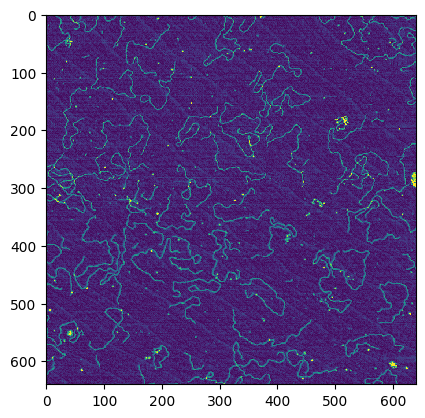

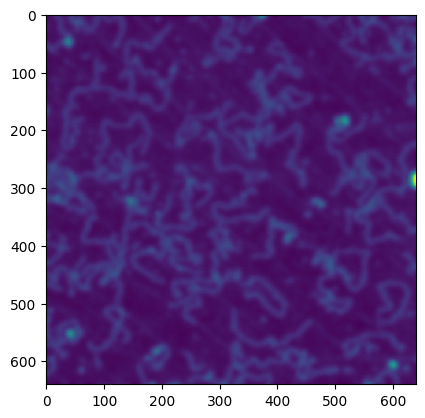

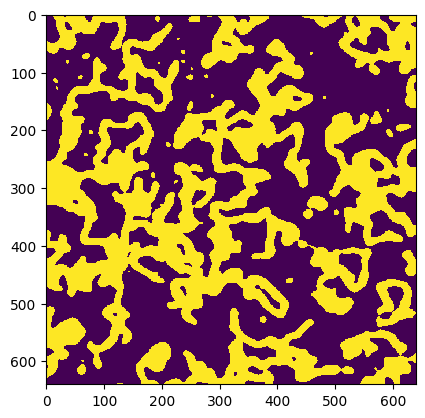

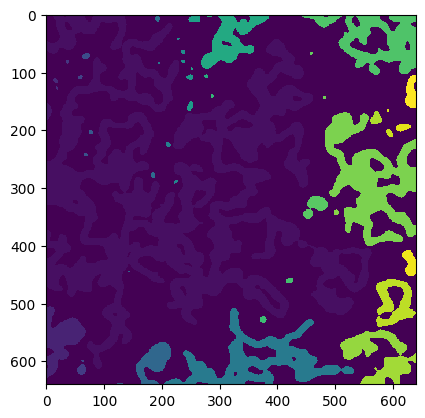

In [11]:
# from skimage import io

ImageI.setGlobalRenderer(NotebookImageRenderer())
ImageI.setUseGlobalImageRenderer(True)

input_path = "/Users/sc13967/Documents/Programming/Python/mia-python/Ex3_Skeletonisation.tif"
series_number = 1
image_name = "demo"
objects_name = "DNA"

workspace = WorkspaceWrapper(1, input_path, series_number, None)

imageLoader = ImageLoader(None)
imageLoader.updateParameterValue(ImageLoader.OUTPUT_IMAGE, image_name)
imageLoader.setShowOutput(True)
status = imageLoader.process(workspace)

filterImage = FilterImage(None)
filterImage.updateParameterValue(FilterImage.INPUT_IMAGE, image_name)
filterImage.updateParameterValue(FilterImage.FILTER_MODE, FilterImage.FilterModes.GAUSSIAN2D)
filterImage.updateParameterValue(FilterImage.FILTER_RADIUS, 5)
filterImage.setShowOutput(True)
status = filterImage.process(workspace)

thresholdImage = ThresholdImage(None)
thresholdImage.updateParameterValue(ThresholdImage.INPUT_IMAGE, image_name)
thresholdImage.setShowOutput(True)
status = thresholdImage.process(workspace)

identifyObjects = IdentifyObjects(None)
identifyObjects.updateParameterValue(IdentifyObjects.INPUT_IMAGE, image_name)
identifyObjects.updateParameterValue(IdentifyObjects.OUTPUT_OBJECTS, objects_name)
identifyObjects.setShowOutput(True)
status = identifyObjects.process(workspace)


